# <center> Dry Bean Classification </center>

- The dataset consists of features describing the shape of the bean and the goal is to predict  - This dataset is collected using a computer vision system that extracted shape features from beans images.
- In total, 13,611 dry bean samples were obtained, the training data contains 10,834 of them.

**Data fields:**
1. **ID**, an ID for this instance.
2. **Area - (A)**, The area of a bean zone and the number of pixels within its boundaries.
3. **Perimeter - (P)**, Bean circumference is defined as the length of its border.
4. **MajorAxisLength - (L)**, The distance between the ends of the longest line that can be drawn from a bean.
5. **MinorAxisLength - (l)**, The longest line that can be drawn from the bean while standing perpendicular to the main axis.
6. **AspectRatio - (K)**, Defines the relationship between L and l : \\(K = \frac{L}{l}\\)
7. **Eccentricity - (Ec)**, Eccentricity of the ellipse having the same moments as the region.
8. **ConvexArea - (C)**, Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
9. **EquivDiameter - (Ed)**, The diameter of a circle having the same area as a bean seed area: \\(E_{d} = \sqrt{\frac{4A}{\pi}}\\)
10. **Extent - (Ex)**, The ratio of the pixels in the bounding box to the bean area \\(Ex = \frac{A}{A_{B}}\\) Where \\(A_{B} = \\) Area of bounding rectangle.
11. **Solidity - (S)**, Also known as convexity. The ratio of the pixels in the convex shell to those found in beans: \\(S = \frac{A}{C}\\)
12. **Roundness - (R)**, Calculated with the following formula: \\(R = \frac{4\pi A}{P^2}\\)
13. **Compactness - (CO)**, Measures the roundness of an object: \\(CO = \frac{E_{d}}{L}\\)
14. **ShapeFactor1** - \\((SF_{1})\\) Calculated with the following formula: \\(SF_{1} = \frac{L}{A}\\)
15. **ShapeFactor2** - \\((SF_{2})\\) Calculated with the following formula: \\(SF_{2} = \frac{l}{A}\\)
16. **ShapeFactor3** - \\((SF_{3})\\) Calculated with the following formula: \\(SF_{3} = \frac{A}{\frac{L}{2}*\frac{L}{2}*\pi}\\)
17. **ShapeFactor4** - \\((SF_{4})\\) Calculated with the following formula: \\(SF_{4} = \frac{A}{\frac{L}{2}*\frac{l}{2}*\pi}\\)
18. **y**, the class of the bean. It can be any of ***BARBUNYA*, *SIRA*, *HOROZ*, *DERMASON*, *CALI*, *BOMBAY*, and *SEKER***.


# libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# import dataset data

In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## train set

In [3]:
dataset_path = "F:/AI-iti/challenge/bean/dataset"
df_train= pd.read_csv(join(dataset_path, 'train.csv'), index_col="ID")
target=df_train['y'].unique()
df_stack=df_train.copy()

## test set

In [4]:
df_test= pd.read_csv(join(dataset_path, 'test.csv'), index_col="ID")
df_test.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607


# Explore data

In [5]:
df_train.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON


In [6]:
df_train.sample(1).T

ID,9403
Area,51798
Perimeter,866.65
MajorAxisLength,336.266184
MinorAxisLength,196.444193
AspectRation,1.711764
Eccentricity,0.811615
ConvexArea,52390
EquivDiameter,256.809778
Extent,0.68745
Solidity,0.9887


In [7]:
df_train['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

Text(0.5, 1.0, "Distributioin of Target variable 'Class'")

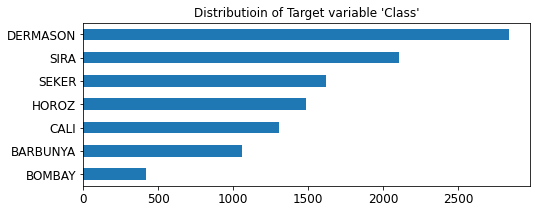

In [8]:
plt.figure(figsize=(8,3))
df_train['y'].value_counts().sort_values().tail(7).plot(kind='barh', fontsize=12)
plt.title("Distributioin of Target variable 'Class'")

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.994677


## check duplicate

In [11]:
df_train[df_train.duplicated()].count()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [12]:
df_test[df_test.duplicated()].count()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

## check null values

In [13]:
df_train.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [14]:
df_test.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

> **<u>N.B:</u> there is no null or duplicte values in data**

# Explore with visualization

## percentage of dry bean types

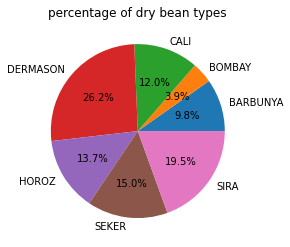

In [15]:
df_train.groupby('y').size().plot(kind='pie', autopct='%1.1f%%',ylabel='')
plt.title('percentage of dry bean types', size=12)
plt.show()

## Correlation 

In [16]:
# for col in df_test.columns:
#     plt.figure(figsize=(18,6))
#     sns.swarmplot(x="y" , y = col,data=df_train)
#     plt.show()

In [17]:

# sns.set_theme(style="whitegrid")
# sns.pairplot(df_train, hue="y")
# plt.show()

In [18]:
# sns.set_theme(style="whitegrid")
# for i in range(16):
#     for j in range(16):
#         sns.scatterplot(x=df_train.columns[i],y=df_train.columns[j],
#                         hue='y',data=df_train,palette='Set2')
#         plt.show()

### heatmap Correlation 

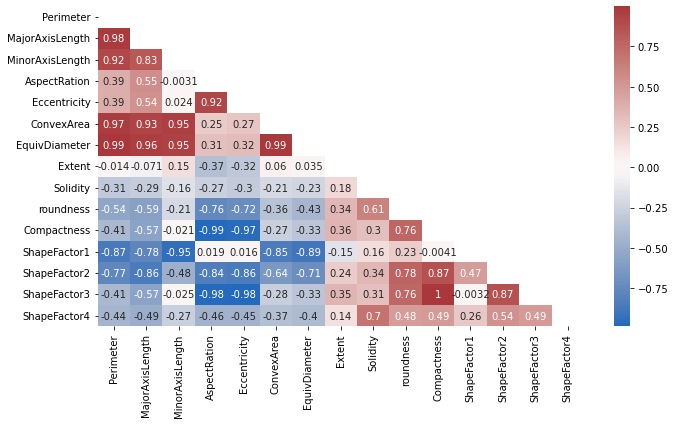

In [19]:
df_corr=df_train.iloc[:,1:].corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(10,6))
sns.heatmap(data=df_corr, mask=mask,annot=True,cmap=sns.color_palette("vlag", as_cmap=True))
plt.tight_layout()
plt.show()

In [20]:
per=df_train['Perimeter'].values
area=df_train['ConvexArea'].values

In [21]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(per,area)
print(correlation)

0.9678233917603346


## distribution

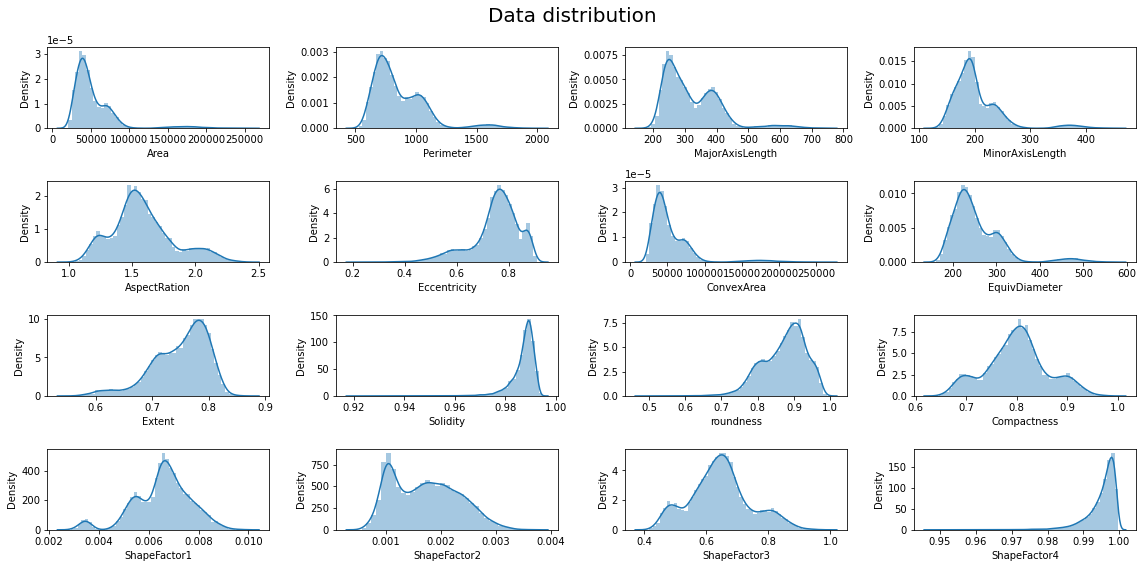

In [22]:
plt.figure(figsize=(16,8))
plt.suptitle('Data distribution', fontsize=20)
for i in range(16):
    plt.subplot(4, 4, i+1)
    sns.distplot(a=df_train.iloc[:,i])
plt.tight_layout()
plt.show()

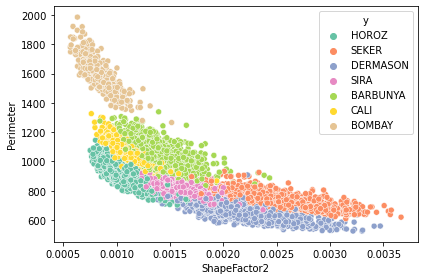

In [23]:

sns.scatterplot(x='ShapeFactor2',y='Perimeter'
                ,hue='y',data=df_train,palette='Set2')
plt.tight_layout()
plt.show()

In [24]:
df_train.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [25]:
df_train[df_train.MajorAxisLength>500]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
18,162230,1486.167,543.407255,381.837178,1.423139,0.711514,163470,454.486140,0.782835,0.992415,0.923009,0.836364,0.003350,0.001011,0.699504,0.995492,BOMBAY
21,203688,1738.084,676.058986,389.116090,1.737422,0.817756,207028,509.257908,0.788071,0.983867,0.847293,0.753274,0.003319,0.000659,0.567422,0.985852,BOMBAY
47,152063,1455.551,524.784869,371.247487,1.413572,0.706785,153860,440.014346,0.764451,0.988321,0.901942,0.838466,0.003451,0.001052,0.703025,0.993777,BOMBAY
89,197245,1702.646,642.077245,396.085390,1.621058,0.787056,200777,501.138837,0.802083,0.982408,0.855002,0.780496,0.003255,0.000745,0.609174,0.987507,BOMBAY
135,141385,1429.427,525.900924,344.355118,1.527205,0.755810,143530,424.284071,0.719165,0.985055,0.869539,0.806776,0.003720,0.000972,0.650887,0.994038,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10596,175144,1584.943,601.674950,372.972648,1.613188,0.784688,176889,472.229041,0.821994,0.990135,0.876149,0.784857,0.003435,0.000804,0.616001,0.993726,BOMBAY
10628,182940,1636.335,624.297759,376.421904,1.658505,0.797777,185434,482.624536,0.792689,0.986550,0.858567,0.773068,0.003413,0.000752,0.597634,0.991179,BOMBAY
10726,145163,1449.277,535.862446,346.383944,1.547019,0.762995,146814,429.915424,0.704613,0.988754,0.868486,0.802287,0.003691,0.000943,0.643664,0.995761,BOMBAY


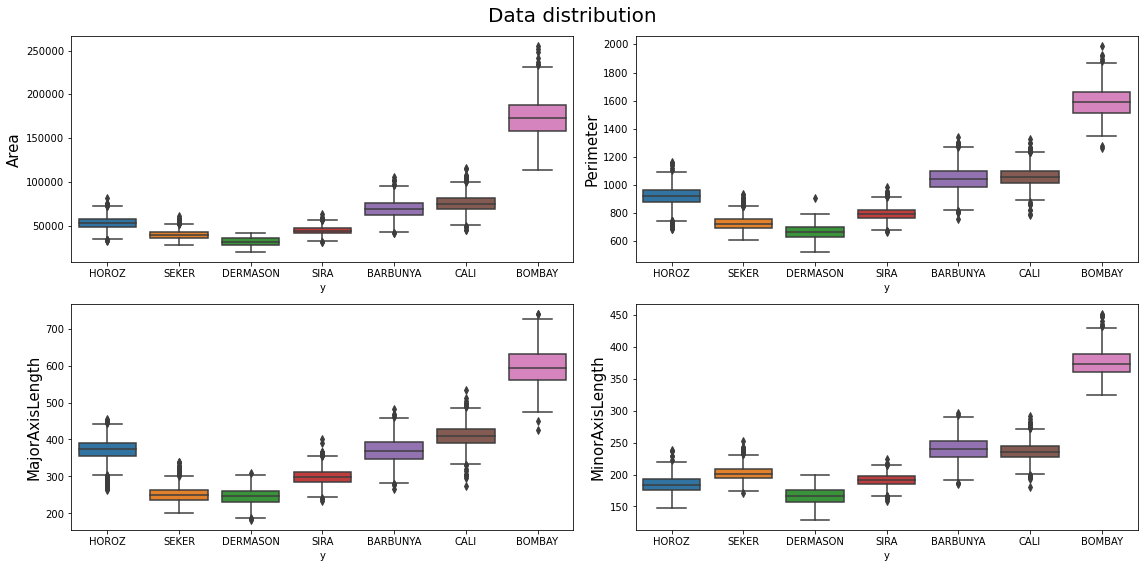

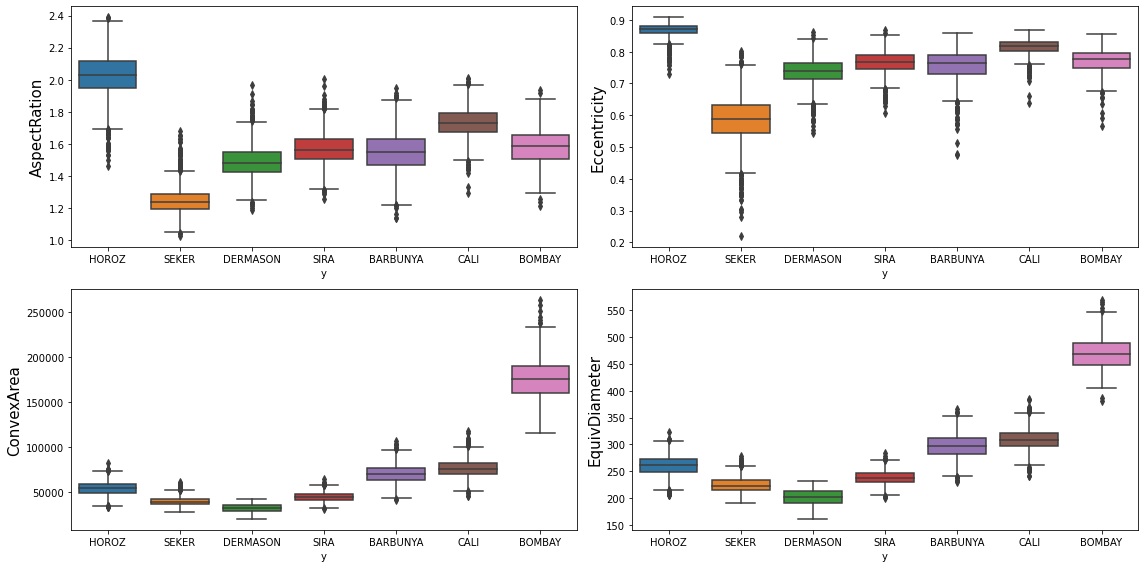

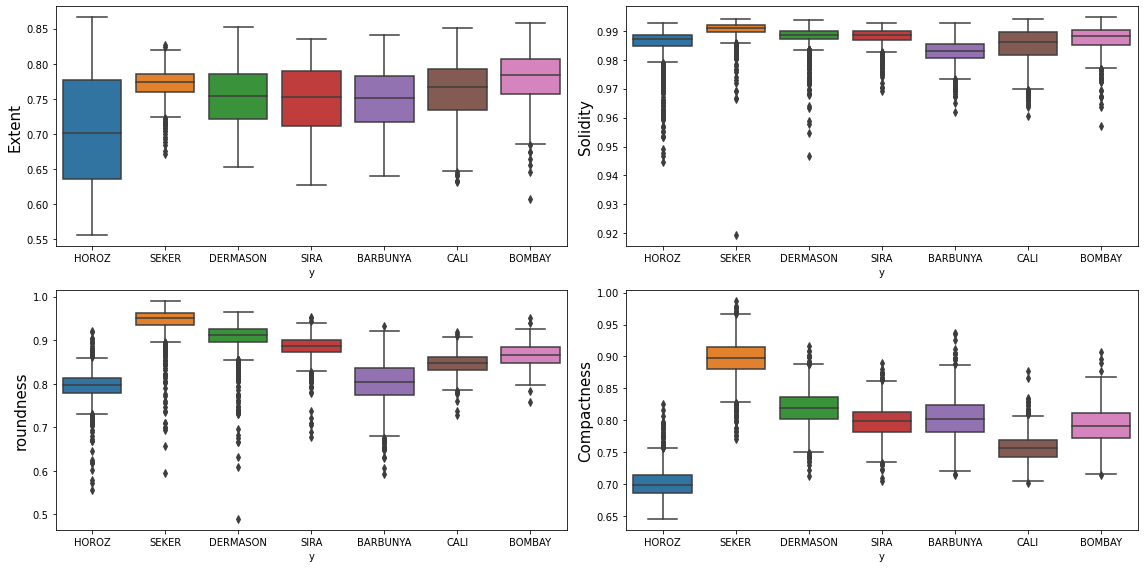

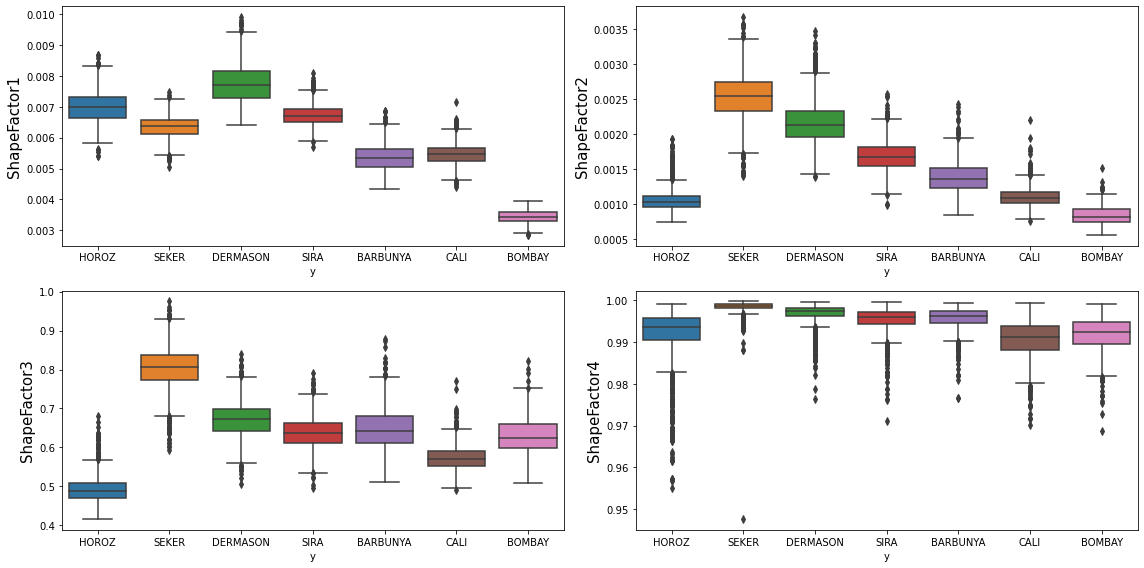

<Figure size 1152x576 with 0 Axes>

In [26]:
plt.figure(figsize=(16,8))
plt.suptitle('Data distribution', fontsize=20)
col=0
for i in range(4):
    for j in range(4):
        plt.subplot(2, 2, j+1)
        b=sns.boxplot(y=df_train.iloc[:,col],x=df_train.iloc[:,-1])
        b.set_ylabel(df_train.columns[col],fontsize=15)
        
        col+=1
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(16,8))

# Preprocessing

In [27]:
for col in list(df_test.columns):
    df_train[col]=np.log(df_train[col])
    df_test[col]=np.log(df_test[col])

In [28]:
df_train.head(1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,10.972293,6.878638,5.984447,5.230817,0.753629,-0.125204,10.984903,5.606929,-0.50293,-0.012609,-0.253959,-0.377518,-4.987847,-6.981046,-0.755035,-0.001406,HOROZ


## Encoding output

In [29]:
encode = LabelEncoder()
df_train.iloc[:,-1]=encode.fit_transform(df_train.iloc[:,-1])

df_train.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,10.972293,6.878638,5.984447,5.230817,0.753629,-0.125204,10.984903,5.606929,-0.502930,-0.012609,-0.253959,-0.377518,-4.987847,-6.981046,-0.755035,-0.001406,4
1,10.703581,6.630157,5.581956,5.365824,0.216132,-0.523539,10.709517,5.472573,-0.259102,-0.005935,-0.025708,-0.109383,-5.121626,-6.042285,-0.218765,-0.002633,5
2,10.362873,6.482775,5.480232,5.126470,0.353762,-0.339487,10.374553,5.302218,-0.221386,-0.011681,-0.071654,-0.178014,-4.882640,-6.077824,-0.356028,-0.002265,3


## split train set

In [30]:
X=df_train.iloc[:,:-1].values
y=df_train.iloc[:,-1].values

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
random_state=42,stratify=y)

## Scaling 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(df_test)

In [33]:
X_train=pd.DataFrame(X_train,columns=list(df_test.columns))
X_val=pd.DataFrame(X_val,columns=list(df_test.columns))

y_train=pd.DataFrame(y_train)
y_val=pd.DataFrame(y_val)

# MODEL

In [34]:
models=['Logistic Regression','knn','SVM','Random Forest','Gradient Boosting']
accuracy=[]
f1=[]

## LogisticRegression

In [35]:
lr =LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_val)

f1_lr=f1_score(y_val, pred_lr,average='micro')
acc_lr=accuracy_score(y_val, pred_lr)

accuracy.append(acc_lr)
f1.append(f1_lr)

print('f1 score=',f1_score(y_val, pred_lr,average='micro'))
print(classification_report(pred_lr, y_val, target_names=target))

f1 score= 0.9220119981541302
              precision    recall  f1-score   support

       HOROZ       0.87      0.95      0.91       193
       SEKER       1.00      1.00      1.00        84
    DERMASON       0.95      0.91      0.93       271
        SIRA       0.92      0.92      0.92       567
    BARBUNYA       0.95      0.97      0.96       294
        CALI       0.95      0.95      0.95       324
      BOMBAY       0.88      0.85      0.87       434

    accuracy                           0.92      2167
   macro avg       0.93      0.94      0.93      2167
weighted avg       0.92      0.92      0.92      2167



## knn

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,algorithm = 'ball_tree')
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_val)

f1_knn=f1_score(y_val, pred_knn,average='micro')
acc_knn=accuracy_score(y_val, pred_knn)

accuracy.append(acc_knn)
f1.append(f1_knn)

print('f1 score=',f1_knn)
print(classification_report(pred_knn, y_val, target_names=target))

f1 score= 0.9160129210890632
              precision    recall  f1-score   support

       HOROZ       0.87      0.94      0.91       195
       SEKER       1.00      1.00      1.00        84
    DERMASON       0.96      0.90      0.93       278
        SIRA       0.92      0.90      0.91       581
    BARBUNYA       0.96      0.96      0.96       296
        CALI       0.94      0.96      0.95       316
      BOMBAY       0.85      0.86      0.85       417

    accuracy                           0.92      2167
   macro avg       0.93      0.93      0.93      2167
weighted avg       0.92      0.92      0.92      2167



## SVM

In [37]:
svm1 = SVC(C=3,gamma=0.05)
svm1.fit(X_train, y_train)
pred_svm = svm1.predict(X_val)

f1_svm=f1_score(y_val, pred_svm,average='micro')
acc_svm=accuracy_score(y_val, pred_svm)

accuracy.append(acc_svm)
f1.append(f1_svm)

print('f1 score=',f1_svm)
print(classification_report(pred_svm, y_val, target_names=target))

f1 score= 0.9353945546838948
              precision    recall  f1-score   support

       HOROZ       0.91      0.96      0.93       202
       SEKER       1.00      1.00      1.00        84
    DERMASON       0.97      0.94      0.95       269
        SIRA       0.93      0.92      0.93       576
    BARBUNYA       0.96      0.98      0.97       291
        CALI       0.94      0.97      0.95       317
      BOMBAY       0.89      0.88      0.88       428

    accuracy                           0.94      2167
   macro avg       0.94      0.95      0.95      2167
weighted avg       0.94      0.94      0.94      2167



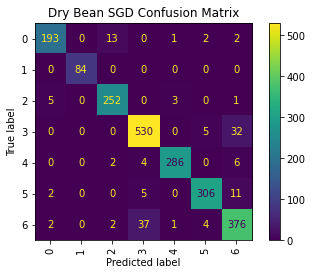

In [38]:
plot_confusion_matrix(svm1, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SGD Confusion Matrix')
plt.show()  

## Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=60,min_samples_split=5)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)

f1_rf=f1_score(y_val, pred_rf,average='micro')
acc_rf=accuracy_score(y_val, pred_rf)

accuracy.append(acc_rf)
f1.append(f1_rf)

print('f1 score=',f1_rf)
print(classification_report(pred_rf, y_val, target_names=target))

f1 score= 0.9284725426857408
              precision    recall  f1-score   support

       HOROZ       0.90      0.94      0.92       200
       SEKER       1.00      1.00      1.00        84
    DERMASON       0.95      0.92      0.94       269
        SIRA       0.94      0.91      0.92       584
    BARBUNYA       0.95      0.97      0.96       292
        CALI       0.95      0.95      0.95       325
      BOMBAY       0.87      0.89      0.88       413

    accuracy                           0.93      2167
   macro avg       0.94      0.94      0.94      2167
weighted avg       0.93      0.93      0.93      2167



In [40]:
importance=pd.DataFrame({'features':df_test.columns,'importance':rf.feature_importances_})
importance.sort_values('importance',ascending=False)
importance.to_csv("importance.csv",index=False)

## Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Build and fit a Gradient Boosting classifier
clf_gb =GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1)

clf_gb.fit(X_train, y_train)

# Calculate the predictions on the test set
pred_gb = clf_gb.predict(X_val)

f1_gb=f1_score(y_val, pred_gb,average='micro')
acc_gb=accuracy_score(y_val, pred_gb)

accuracy.append(acc_gb)
f1.append(f1_gb)

print('f1 score=',f1_gb)
print(classification_report(y_val,pred_gb, target_names=target))

f1 score= 0.9293954776188279
              precision    recall  f1-score   support

       HOROZ       0.96      0.91      0.93       211
       SEKER       1.00      1.00      1.00        84
    DERMASON       0.93      0.97      0.95       261
        SIRA       0.91      0.93      0.92       567
    BARBUNYA       0.97      0.95      0.96       298
        CALI       0.96      0.95      0.95       324
      BOMBAY       0.87      0.87      0.87       422

    accuracy                           0.93      2167
   macro avg       0.94      0.94      0.94      2167
weighted avg       0.93      0.93      0.93      2167



## dataframe

In [42]:
metrics=pd.DataFrame({'Models':models,'Accuracy':accuracy,'F1_score':f1})

In [43]:
metrics.to_csv("metrics.csv",index=False)

## XGBoost

In [44]:
# import xgboost as xgb
# clf_xgb = xgb.XGBClassifier(
# n_estimators=100,
# learning_rate=0.1,
# max_depth=3
# )

# clf_xgb.fit(X_train, y_train)

# # Calculate the predictions on the test set
# pred_xgb = clf_xgb.predict(X_val)

# print('f1 score=',f1_score(y_val,pred_xgb,average='micro'))
# print(classification_report(y_val,pred_xgb, target_names=target))

## Cat Boost

In [45]:
# import catboost as cb
# clf_cat = cb.CatBoostClassifier(
# n_estimators=1500,
# learning_rate=0.1
# )

# clf_cat.fit(X_train, y_train)

# # Calculate the predictions on the test set
# pred_cat = clf_cat.predict(X_val)

# print('f1 score=',f1_score(y_val,pred_cat,average='micro'))
# # print(classification_report(ys_val,pred_cat, target_names=target))

In [46]:
# plot_confusion_matrix(clf_cat, X_val, y_val)  
# plt.xticks(rotation=90)
# plt.grid(False)
# plt.title('Dry Bean SGD Confusion Matrix')
# plt.show()  

## Ensumble
### Voting

In [1]:
# from sklearn.ensemble import VotingClassifier
# clf_vote = VotingClassifier(
#     estimators=[('knn', knn), ('svm', svm1), ('rf',rf),('xgb',clf_xgb),('gb',clf_gb)] ,
#     weights=[1, 2, 1,1,1])
# clf_vote.fit(X_train, y_train)
# pred_vote = clf_vote.predict(X_val)
# print('f1 score=',f1_score(y_val,pred_vote,average='micro'))
# print(classification_report(y_val,pred_vote, target_names=target))

In [ ]:
# plot_confusion_matrix(clf_vote, X_val, y_val)  
# plt.xticks(rotation=90)
# plt.grid(False)
# plt.title('Dry Bean SGD Confusion Matrix')
# plt.show()  

### Stacking

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# pred_lr_train=lr.predict(X_train)
# pred_knn_train=knn.predict(X_train)
# pred_svm_train=svm1.predict(X_train)
# pred_rf_train=rf.predict(X_train)
# pred_xgb_train=clf_xgb.predict(X_train)

# # Create a Pandas DataFrame with the predictions
# pred_df  = pd.DataFrame({
# 'pred_lr': pred_lr_train,
# 'pred_knn': pred_knn_train,
# 'pred_svm':pred_svm_train,
# 'pred_rf':pred_rf_train,
# 'pred_xgb':pred_xgb_train

# })

# # Concatenate X_train with the predictions DataFrame
# X_train_2nd = pd.concat([X_train, pred_df], axis=1)

# # Build the second-layer meta estimator
# clf_stack =DecisionTreeClassifier(random_state = 500)
# clf_stack.fit(X_train_2nd, y_train)

# # Create a Pandas DataFrame with the predictions
# pred_df = pd.DataFrame({
# 'pred_lr': pred_lr,
# 'pred_knn': pred_knn,
# 'pred_svm':pred_svm,
# 'pred_rf':pred_rf,
# 'pred_xgb':pred_xgb

# })

# # Concatenate X_test with the predictions DataFrame
# X_val_2nd = pd.concat([X_val, pred_df], axis=1)

# # Obtain the final predictions from the second-layer estimator
# pred_stack = clf_stack.predict(X_val_2nd)

# # Evaluate the new performance on the test set
# # print('Accuracy: {:0.4f}'.format(accuracy_score(y_test, pred_stack)))
# print('f1 score=',f1_score(y_val, pred_stack,average='micro'))

# submit test set

In [ ]:
y_pred = svm1.predict(X_test)
y_pred = encode.inverse_transform(y_pred)
y_sub=pd.DataFrame(y_pred,columns=["y"])
submission=pd.concat([pd.DataFrame(df_test.index),y_sub],axis=1)
submission.head()

In [ ]:
submission.to_csv("submission.csv",index=False)

In [ ]:
encode.inverse_transform([3,6])